In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'/home/khan/Downloads/indian-liver-patient-records/indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
data['Albumin_and_Globulin_Ratio'].fillna(value=data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [7]:
nc=data._get_numeric_data()
nc.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
cat=data.select_dtypes(include='object')
cat.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


In [9]:
dum=pd.get_dummies(cat)
dum.head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
dum.drop(['Gender_Female'],axis=1,inplace=True)
dum.head()

,Gender_Male
0,0
1,1
2,1
3,1
4,1


In [11]:
new=pd.concat([dum,nc],axis=1)
new.head()

,Gender_Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [33]:
#X=new.iloc[:,[4,5]]
#y=new.iloc[:,10]
X=ladka.iloc[:,[4,5,6]]
y=ladka.iloc[:,10]

In [31]:
ladka=data[data['Gender']=='Male']

In [32]:
ladka.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [36]:
def afzal(X_train,y_train,X_test,y_test):
    models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=300),SVC(kernel='rbf'),XGBClassifier()]
    for model in models:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print(accuracy_score(y_test,pred))

In [37]:
afzal(X_train,y_train,X_test,y_test)

0.7368421052631579
0.6466165413533834
0.7142857142857143
0.7368421052631579
0.7218045112781954


In [38]:
classifier = LogisticRegression(random_state=45)
classifier.fit(X_train, y_train)
pred=classifier.predict(X_test)
print(accuracy_score(y_test,pred))

0.7368421052631579


In [39]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 15)
print(accuracies)

[0.72727273 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.75       0.75       0.75       0.75       0.75
 0.7        0.75       0.75      ]


In [40]:
accuracies.std()

0.018579247387882046

In [41]:
accuracies.mean()

0.7308658008658008

In [15]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


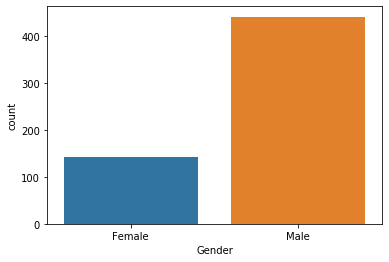

In [16]:
sns.countplot(x='Gender',data=data)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [18]:
trace = go.Scatter(
    y = data['Total_Protiens'].values,
    x = data['Age'].values,
    mode='markers',
    
    marker=dict(
        size= data['Total_Bilirubin'].values,
        color = data['Total_Protiens'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = data['Dataset'].values
)

In [19]:
x=[trace]

In [20]:
layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Total Proteins in Male and Females',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Total Protein',
        ticklen= 10,
        gridwidth= 0.1,
    ),xaxis=dict(
        title= 'Age',
        ticklen= 10,
        gridwidth= 0.1,
    ),
    showlegend= False
)

In [43]:

fig = go.Figure(data=x, layout=layout)
py.iplot(fig,filename='Plotly')

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[1, 1, 1],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["Text A", "Text B", "Text C"],
    textposition="top center"
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[2, 2, 2],
    mode="markers+text",
    name="Markers and Text",
    text=["Text D", "Text E", "Text F"],
    textposition="bottom center"
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[3, 3, 3],
    mode="lines+text",
    name="Lines and Text",
    text=["Text G", "Text H", "Text I"],
    textposition="bottom center"
))

fig.show()

In [23]:
df=data

Text(0.5, 1.0, 'Gender wise liver patient')

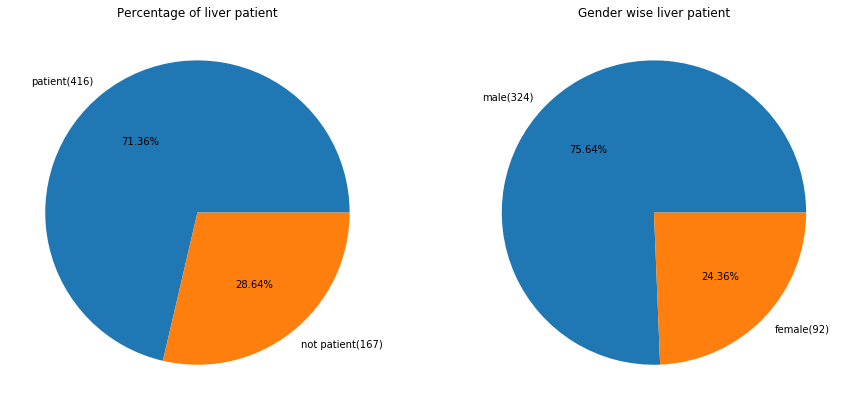

In [42]:
target_counts=df['Dataset'].value_counts().values
gender_counts=df['Gender'].value_counts().values

fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,10))


target_sizes=df.groupby('Dataset').size()
axes[0].pie(
    x=target_counts,
    labels=['patient({})'.format(target_sizes[1]),'not patient({})'.format(target_sizes[2])],
    autopct='%1.2f%%'
)
axes[0].set_title("Percentage of liver patient")

gender_sizes=actual.groupby('Gender').size()
axes[1].pie(
    x=gender_counts, 
    labels=['male({})'.format(gender_sizes['Male']), 'female({})'.format(gender_sizes['Female'])], 
    autopct="%1.2f%%"
)
axes[1].set_title("Gender wise liver patient")

In [78]:
target_sizes[1]

416

In [77]:
target_counts

array([416, 167])

In [25]:
actual=data[data['Dataset']==1]

In [26]:
no_disease=data[data['Dataset']==2]

In [27]:
male_no=no_disease[no_disease['Gender']=='Male']

In [95]:
gender_sizes

Gender
Female    142
Male      441
dtype: int64

In [96]:
actual.shape

(416, 11)

In [97]:
df.shape

(583, 11)

In [28]:
actual.groupby('Gender').size()

Gender
Female     92
Male      324
dtype: int64

In [29]:
male=actual[actual['Gender']=='Male']
Female=actual[actual['Gender']=='Female']

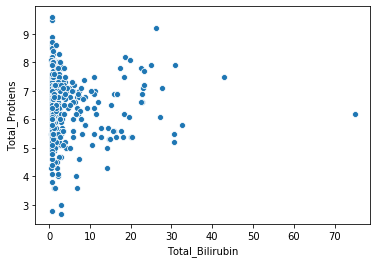

In [108]:
sns.scatterplot(x='Total_Bilirubin',y='Total_Protiens',data=actual)

Text(0.5, 1.0, 'Male Patients without liver dieases')

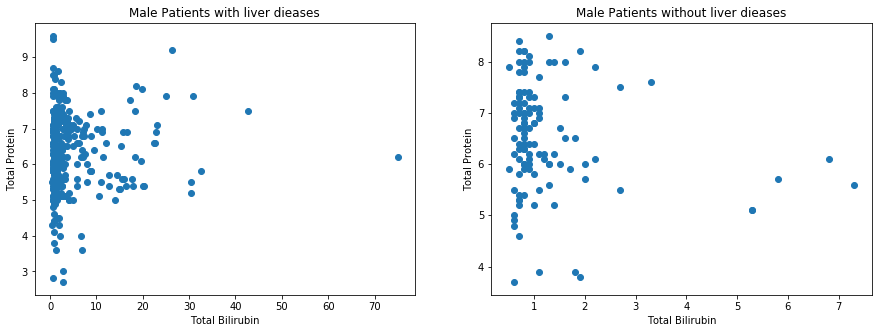

In [143]:
fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,5))
axes[0].scatter(x='Total_Bilirubin',y='Total_Protiens',data=male)
axes[1].scatter(x='Total_Bilirubin',y='Total_Protiens',data=male_no)
axes[0].set_xlabel('Total Bilirubin')
axes[0].set_ylabel('Total Protein')
axes[0].set_title ('Male Patients with liver dieases')
axes[1].set_xlabel('Total Bilirubin') 
axes[1].set_ylabel('Total Protein')
axes[1].set_title ('Male Patients without liver dieases')

Text(0.5, 1.0, 'Male Patients without liver dieases')

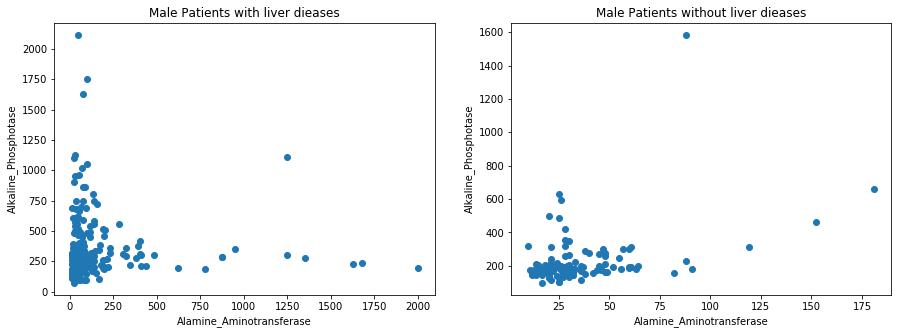

In [314]:
fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,5))
axes[0].scatter(x='Alamine_Aminotransferase',y='Alkaline_Phosphotase',data=male)
axes[1].scatter(x='Alamine_Aminotransferase',y='Alkaline_Phosphotase',data=male_no)
axes[0].set_xlabel('Alamine_Aminotransferase')
axes[0].set_ylabel('Alkaline_Phosphotase')
axes[0].set_title ('Male Patients with liver dieases')
axes[1].set_xlabel('Alamine_Aminotransferase') 
axes[1].set_ylabel('Alkaline_Phosphotase')
axes[1].set_title ('Male Patients without liver dieases')

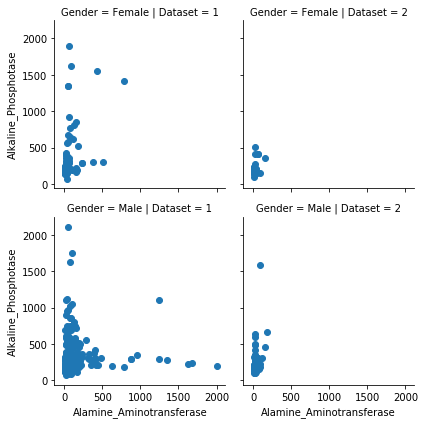

In [375]:
g=sns.FacetGrid(data=df,row='Gender',col='Dataset')
g.map(plt.scatter,'Alamine_Aminotransferase','Alkaline_Phosphotase')